In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
! ls


 05_hatzis_2011_clinical.csv    05_hatzis_2011_suppData.csv
 05_hatzis_2011_gex.csv        'analysis and ML.ipynb'
 05_hatzis_2011.ipynb	        GSE25055_series_matrix.csv
 05_hatzis_2011_merge.csv       nihms905547.pdf
 05_hatzis_2011_merging.ipynb


In [3]:
pd.set_option('display.max_column', 111)
df = pd.read_csv('05_hatzis_2011_merge.csv')
df.head()

/home/dina/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (9) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,patient_ID,age,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,drfs_1_event_0_censored,drfs_even_time_years,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,...,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-hum_alu_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
0,GSM615096,37.8,P,P,N,Taxane/Anthracycline,T2,N1,IIB,2,RD,RCB-III,1,2.346,P,N,Rx Sensitive,Low,LumA,RD,12.359267,8.021741,8.294244,10.840949,7.874062,8.341292,8.256335,6.485966,6.495728,7.063123,8.539362,8.621234,9.379185,11.588030,10.158006,8.400098,8.021619,7.375981,9.786792,8.682812,10.224682,11.332837,13.658462,15.586161,13.362301,11.816788,13.552842,13.575653,9.683268,12.790524,13.548146,11.967789,14.477890,13.987295,11.688010,...,12.298846,13.162034,16.859423,14.912115,13.596620,13.903880,10.082506,6.651611,8.644455,7.940550,11.059883,11.414093,11.883115,3.675747,6.013236,4.074286,6.883389,13.477346,11.855315,5.312034,1.902119,3.509960,5.672986,2.552436,4.944747,6.339862,5.944751,6.033983,7.037688,3.336995,3.276685,4.924490,7.041611,7.370888,12.032043,11.747770,12.100508,13.403070,13.327073,15.640044,15.441187,11.190421,11.955084,12.139089,14.074549,9.047564,11.274337,17.356685,17.004035,3.882092,4.345965,5.363505,2.262616,3.963081,2.511676
1,GSM615097,45.8,P,P,N,Taxane/Anthracycline,T3,N1,IIIA,2,RD,NA,0,5.552,P,N,Rx Sensitive,Low,Normal,RD,12.613243,7.842947,5.474758,11.715159,7.347955,9.419005,7.983681,7.330512,7.332244,7.033859,9.188714,8.976879,9.664692,12.417045,11.103097,9.381795,6.014027,6.499991,10.435166,8.255601,10.748656,11.676090,14.308150,14.927051,13.406545,11.924287,13.122851,13.539040,10.107784,13.309852,13.975365,11.358298,15.359395,14.351123,11.397642,...,12.796772,13.814620,17.501577,14.953623,13.845252,14.109265,10.540983,6.649725,8.645270,8.581807,11.106517,10.948901,11.894003,2.012409,5.225088,5.013689,9.136870,13.928236,11.729127,5.855767,3.274438,2.668382,2.254309,3.518753,0.666914,7.180972,6.188576,1.759659,6.516133,3.430163,5.562163,4.843321,7.444250,5.366801,12.903103,12.702112,12.960423,14.493431,14.380754,16.719929,16.383235,10.750292,11.610319,12.080350,13.681936,8.765575,11.287301,18.404677,18.143576,4.319704,4.686218,4.604493,3.064326,4.201127,2.657320
2,GSM615098,40.7,N,N,N,Taxane/Anthracycline,T3,N0,IIB,3,RD,RCB-II,0,5.503,N,N,Rx Insensitive,High,Basal,pCR,11.551397,8.776267,8.197121,10.715077,6.523880,9.297479,7.820261,6.423794,10.066291,6.661108,10.387343,9.325700,8.852809,11.092199,9.400802,8.772876,7.228012,7.815219,10.059531,8.494142,10.302272,12.098202,14.234113,14.049992,12.836202,12.142938,12.172660,12.749435,10.797903,13.494802,13.

In [4]:
df.dtypes.unique()

array([dtype('O'), dtype('float64'), dtype('int64')], dtype=object)

In [5]:
clinical_data = df.select_dtypes('object')

In [6]:
for col in clinical_data.columns[1:]:
    print('{}========>{}'.format(col, clinical_data[col].unique()))

er_ihc========>[' P' ' N' ' I' ' NA']
pr_ihc========>[' P' ' N' ' I' ' NA']
her2========>[' N' ' I' ' NA' ' P']
NAC========>['Taxane/Anthracycline']
stage========>[' T2' ' T3' ' T4' ' T1' ' T0']
nodal_stat========>[' N1' ' N0' ' N3' ' N2']
ajcc_stage========>[' IIB' ' IIIA' ' IIIB' ' IIA' ' IIIC' ' Inflammatory' ' I']
grade========>['2' '3' ' 4=Indeterminate' ' NA' '1' 2 3 1]
RECIST========>[' RD' ' pCR' ' NA']
RCB_class========>[' RCB-III' ' NA' ' RCB-II' ' RCB-0/I']
esr1_stat========>[' P' ' N']
erbb2_stat========>[' N' ' P']
chemosensitivity_pred========>[' Rx Sensitive' ' Rx Insensitive']
ggi_class========>[' Low' ' High']
pam50_class========>[' LumA' ' Normal' ' Basal' ' LumB' ' Her2']
dlda30_pred========>[' RD' ' pCR']


In [7]:
cd = clinical_data.copy()

In [8]:
cd.head()

,patient_ID,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
0,GSM615096,P,P,N,Taxane/Anthracycline,T2,N1,IIB,2,RD,RCB-III,P,N,Rx Sensitive,Low,LumA,RD
1,GSM615097,P,P,N,Taxane/Anthracycline,T3,N1,IIIA,2,RD,NA,P,N,Rx Sensitive,Low,Normal,RD
2,GSM615098,N,N,N,Taxane/Anthracycline,T3,N0,IIB,3,RD,RCB-II,N,N,Rx Insensitive,High,Basal,pCR
3,GSM615099,N,N,N,Taxane/Anthracycline,T2,N1,IIB,4=Indeterminate,pCR,RCB-0/I,N,N,Rx Insensitive,High,Basal,pCR
4,GSM615100,P,P,N,Taxane/Anthracycline,T3,N1,IIIA,2,RD,RCB-II,P,N,Rx Insensitive,High,LumA,RD


In [9]:
from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

In [10]:
enc = OrdinalEncoder()
cd[["er_ihc","pr_ihc", "her2", "stage", "nodal_stat", "ajcc_stage"]] = enc.fit_transform(cd[["er_ihc","pr_ihc", "her2", "stage", "nodal_stat", "ajcc_stage"]])

In [11]:
cd[["RCB_class","esr1_stat", "erbb2_stat", "chemosensitivity_pred", "ggi_class", "pam50_class", "dlda30_pred"]] = enc.fit_transform(cd[["RCB_class","esr1_stat", "erbb2_stat", "chemosensitivity_pred", "ggi_class", "pam50_class", "dlda30_pred"]])

In [12]:
cd.head()

,patient_ID,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
0,GSM615096,3,3,1,Taxane/Anthracycline,2,1,2,2,RD,3,1,0,1,1,2,0
1,GSM615097,3,3,1,Taxane/Anthracycline,3,1,3,2,RD,0,1,0,1,1,4,0
2,GSM615098,1,1,1,Taxane/Anthracycline,3,0,2,3,RD,2,0,0,0,0,0,1
3,GSM615099,1,1,1,Taxane/Anthracycline,2,1,2,4=Indeterminate,pCR,1,0,0,0,0,0,1
4,GSM615100,3,3,1,Taxane/Anthracycline,3,1,3,2,RD,2,1,0,0,0,2,0


In [13]:
enc.get_params(deep=True)

{'categories': 'auto', 'dtype': numpy.float64}

In [14]:
cd['grade'].unique()

array(['2', '3', ' 4=Indeterminate', ' NA', '1', 2, 3, 1], dtype=object)

In [15]:
d = {'2':2,
    '3':3,
    ' 4=Indeterminate':4,
    ' NA':'NA',
    '1':1}

In [16]:
cd['grade'] = cd['grade'].map(d)

In [17]:
cd['grade'].value_counts()

3     36
2     30
4     15
NA     8
1      7
Name: grade, dtype: int64

In [18]:
cd.head()

,patient_ID,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
0,GSM615096,3,3,1,Taxane/Anthracycline,2,1,2,2,RD,3,1,0,1,1,2,0
1,GSM615097,3,3,1,Taxane/Anthracycline,3,1,3,2,RD,0,1,0,1,1,4,0
2,GSM615098,1,1,1,Taxane/Anthracycline,3,0,2,3,RD,2,0,0,0,0,0,1
3,GSM615099,1,1,1,Taxane/Anthracycline,2,1,2,4,pCR,1,0,0,0,0,0,1
4,GSM615100,3,3,1,Taxane/Anthracycline,3,1,3,2,RD,2,1,0,0,0,2,0


In [19]:
le = LabelEncoder()
cd['RECIST'] = le.fit_transform(cd['RECIST'])

In [20]:
list(le.inverse_transform([0, 1, 2]))

[' NA', ' RD', ' pCR']

In [21]:
cd['er_ihc'].value_counts()

3.0    174
1.0    131
0.0      4
2.0      1
Name: er_ihc, dtype: int64

In [22]:
cd.head()

,patient_ID,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
0,GSM615096,3,3,1,Taxane/Anthracycline,2,1,2,2,1,3,1,0,1,1,2,0
1,GSM615097,3,3,1,Taxane/Anthracycline,3,1,3,2,1,0,1,0,1,1,4,0
2,GSM615098,1,1,1,Taxane/Anthracycline,3,0,2,3,1,2,0,0,0,0,0,1
3,GSM615099,1,1,1,Taxane/Anthracycline,2,1,2,4,2,1,0,0,0,0,0,1
4,GSM615100,3,3,1,Taxane/Anthracycline,3,1,3,2,1,2,1,0,0,0,2,0


In [23]:
cd.dtypes

patient_ID               object
er_ihc                   object
pr_ihc                   object
her2                     object
NAC                      object
stage                    object
nodal_stat               object
ajcc_stage               object
grade                    object
RECIST                    int64
RCB_class                object
esr1_stat                object
erbb2_stat               object
chemosensitivity_pred    object
ggi_class                object
pam50_class              object
dlda30_pred              object
dtype: object

In [24]:
import seaborn as sns
cd['er_ihc'].dtypes

dtype('O')

In [25]:
d = {'Taxane/Anthracycline':1}
cd['NAC'] = cd['NAC'].map(d)

In [26]:
cd.set_index('patient_ID', inplace=True)

In [27]:
cd.head()

,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,grade,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
patient_ID,,,,,,,,,,,,,,,,
GSM615096,3,3,1,1,2,1,2,2,1,3,1,0,1,1,2,0
GSM615097,3,3,1,1,3,1,3,2,1,0,1,0,1,1,4,0
GSM615098,1,1,1,1,3,0,2,3,1,2,0,0,0,0,0,1
GSM615099,1,1,1,1,2,1,2,4,2,1,0,0,0,0,0,1
GSM615100,3,3,1,1,3,1,3,2,1,2,1,0,0,0,2,0


In [28]:
cd.shape

(310, 16)

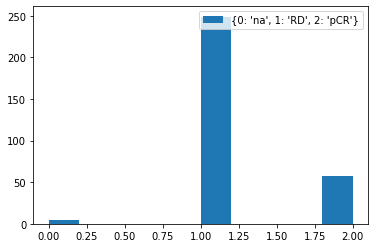

In [29]:
plt.hist(cd['RECIST'], label={0:'na', 1:'RD', 2:'pCR'})
plt.legend()

In [30]:
(cd.isna().sum()/cd.shape[0]).sort_values(ascending=False)

grade                    0.690323
dlda30_pred              0.000000
pam50_class              0.000000
ggi_class                0.000000
chemosensitivity_pred    0.000000
erbb2_stat               0.000000
esr1_stat                0.000000
RCB_class                0.000000
RECIST                   0.000000
ajcc_stage               0.000000
nodal_stat               0.000000
stage                    0.000000
NAC                      0.000000
her2                     0.000000
pr_ihc                   0.000000
er_ihc                   0.000000
dtype: float64

In [31]:
cd['grade'].value_counts()

3     36
2     30
4     15
NA     8
1      7
Name: grade, dtype: int64

In [32]:
cd.describe()

,NAC,RECIST
count,310.0,310.000000
mean,1.0,1.170968
std,0.0,0.409983
min,1.0,0.000000
25%,1.0,1.000000
50%,1.0,1.000000
75%,1.0,1.000000
max,1.0,2.000000


In [33]:
#cd.dropna(inplace=True)

In [34]:
(cd.isna().sum()/cd.shape[0]).sort_values(ascending=False)

grade                    0.690323
dlda30_pred              0.000000
pam50_class              0.000000
ggi_class                0.000000
chemosensitivity_pred    0.000000
erbb2_stat               0.000000
esr1_stat                0.000000
RCB_class                0.000000
RECIST                   0.000000
ajcc_stage               0.000000
nodal_stat               0.000000
stage                    0.000000
NAC                      0.000000
her2                     0.000000
pr_ihc                   0.000000
er_ihc                   0.000000
dtype: float64

In [35]:
for col in cd.columns:
    print('{}=====>{}'.format(col, cd[col].unique()))

er_ihc=====>[3.0 1.0 0.0 2.0]
pr_ihc=====>[3.0 1.0 0.0 2.0]
her2=====>[1.0 0.0 2.0 3.0]
NAC=====>[1]
stage=====>[2.0 3.0 4.0 1.0 0.0]
nodal_stat=====>[1.0 0.0 3.0 2.0]
ajcc_stage=====>[2.0 3.0 4.0 1.0 5.0 6.0 0.0]
grade=====>[2 3 4 'NA' 1 nan]
RECIST=====>[1 2 0]
RCB_class=====>[3.0 0.0 2.0 1.0]
esr1_stat=====>[1.0 0.0]
erbb2_stat=====>[0.0 1.0]
chemosensitivity_pred=====>[1.0 0.0]
ggi_class=====>[1.0 0.0]
pam50_class=====>[2.0 4.0 0.0 3.0 1.0]
dlda30_pred=====>[0.0 1.0]


In [36]:
cd[cd['grade']=='NA'] = None

In [37]:
cd['grade'].unique()

array([2, 3, 4, None, 1, nan], dtype=object)

In [38]:
cd.drop('grade', axis=1, inplace=True)

In [39]:
cd.dtypes

er_ihc                    object
pr_ihc                    object
her2                      object
NAC                      float64
stage                     object
nodal_stat                object
ajcc_stage                object
RECIST                   float64
RCB_class                 object
esr1_stat                 object
erbb2_stat                object
chemosensitivity_pred     object
ggi_class                 object
pam50_class               object
dlda30_pred               object
dtype: object

In [40]:
print(df.shape)
print(df.select_dtypes('float64').shape)

(310, 22303)
(310, 22285)


In [41]:
cd.head()

,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred
patient_ID,,,,,,,,,,,,,,,
GSM615096,3,3,1,1.0,2,1,2,1.0,3,1,0,1,1,2,0
GSM615097,3,3,1,1.0,3,1,3,1.0,0,1,0,1,1,4,0
GSM615098,1,1,1,1.0,3,0,2,1.0,2,0,0,0,0,0,1
GSM615099,1,1,1,1.0,2,1,2,2.0,1,0,0,0,0,0,1
GSM615100,3,3,1,1.0,3,1,3,1.0,2,1,0,0,0,2,0


In [42]:
#make copy for after (merge with gex)
cd1 = cd.copy()

In [43]:
cd.dropna(inplace=True)

In [44]:
X = cd.drop('RECIST', axis=1)
y = cd['RECIST']

In [45]:
print(X.shape, y.shape)

(302, 14) (302,)


In [46]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, f1_score

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)

print(y_test.shape)
print(y_pred.shape)

print(knn.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))

(202, 14) (100, 14)
(100,)
(100,)
0.87
0.87
0.5248581915248581


In [48]:
cd1.shape

(310, 15)

In [49]:
gex = pd.read_csv('05_hatzis_2011_gex.csv')
gex.shape

(310, 22285)

In [50]:
merg = pd.merge(cd1, gex, on='patient_ID')

In [51]:
merg = merg.set_index('patient_ID')

In [52]:
merg.shape

(310, 22299)

# dropna and split

In [53]:
merg.head()

,er_ihc,pr_ihc,her2,NAC,stage,nodal_stat,ajcc_stage,RECIST,RCB_class,esr1_stat,erbb2_stat,chemosensitivity_pred,ggi_class,pam50_class,dlda30_pred,Unnamed: 0,1007_s_at,1053_at,117_at,121_at,1255_g_at,1294_at,1316_at,1320_at,1405_i_at,1431_at,1438_at,1487_at,1494_f_at,1598_g_at,160020_at,1729_at,1773_at,177_at,179_at,1861_at,200000_s_at,200001_at,200002_at,200003_s_at,200004_at,200005_at,200006_at,200007_at,200008_s_at,200009_at,200010_at,200011_s_at,200012_x_at,200013_at,200014_s_at,200015_s_at,200016_x_at,200017_at,200018_at,...,AFFX-HSAC07/X00351_5_at,AFFX-HSAC07/X00351_M_at,AFFX-hum_alu_at,AFFX-HUMGAPDH/M33197_3_at,AFFX-HUMGAPDH/M33197_5_at,AFFX-HUMGAPDH/M33197_M_at,AFFX-HUMISGF3A/M97935_3_at,AFFX-HUMISGF3A/M97935_5_at,AFFX-HUMISGF3A/M97935_MA_at,AFFX-HUMISGF3A/M97935_MB_at,AFFX-HUMRGE/M10098_3_at,AFFX-HUMRGE/M10098_5_at,AFFX-HUMRGE/M10098_M_at,AFFX-LysX-3_at,AFFX-LysX-5_at,AFFX-LysX-M_at,AFFX-M27830_3_at,AFFX-M27830_5_at,AFFX-M27830_M_at,AFFX-PheX-3_at,AFFX-PheX-5_at,AFFX-PheX-M_at,AFFX-r2-Bs-dap-3_at,AFFX-r2-Bs-dap-5_at,AFFX-r2-Bs-dap-M_at,AFFX-r2-Bs-lys-3_at,AFFX-r2-Bs-lys-5_at,AFFX-r2-Bs-lys-M_at,AFFX-r2-Bs-phe-3_at,AFFX-r2-Bs-phe-5_at,AFFX-r2-Bs-phe-M_at,AFFX-r2-Bs-thr-3_s_at,AFFX-r2-Bs-thr-5_s_at,AFFX-r2-Bs-thr-M_s_at,AFFX-r2-Ec-bioB-3_at,AFFX-r2-Ec-bioB-5_at,AFFX-r2-Ec-bioB-M_at,AFFX-r2-Ec-bioC-3_at,AFFX-r2-Ec-bioC-5_at,AFFX-r2-Ec-bioD-3_at,AFFX-r2-Ec-bioD-5_at,AFFX-r2-Hs18SrRNA-3_s_at,AFFX-r2-Hs18SrRNA-5_at,AFFX-r2-Hs18SrRNA-M_x_at,AFFX-r2-Hs28SrRNA-3_at,AFFX-r2-Hs28SrRNA-5_at,AFFX-r2-Hs28SrRNA-M_at,AFFX-r2-P1-cre-3_at,AFFX-r2-P1-cre-5_at,AFFX-ThrX-3_at,AFFX-ThrX-5_at,AFFX-ThrX-M_at,AFFX-TrpnX-3_at,AFFX-TrpnX-5_at,AFFX-TrpnX-M_at
patient_ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
GSM615096,3,3,1,1.0,2,1,2,1.0,3,1,0,1,1,2,0,0,12.359267,8.021741,8.294244,10.840949,7.874062,8.341292,8.256335,6.485966,6.495728,7.063123,8.539362,8.621234,9.379185,11.588030,10.158006,8.400098,8.021619,7.375981,9.786792,8.682812,10.224682,11.332837,13.658462,15.586161,13.362301,11.816788,13.552842,13.575653,9.683268,12.790524,13.548146,11.967789,14.477890,13.987295,11.688010,12.242340,13.932407,14.397076,14.927809,...,12.298846,13.162034,16.859423,14.912115,13.596620,13.903880,10.082506,6.651611,8.644455,7.940550,11.059883,11.414093,11.883115,3.675747,6.013236,4.074286,6.883389,13.477346,11.855315,5.312034,1.902119,3.509960,5.672986,2.552436,4.944747,6.339862,5.944751,6.033983,7.037688,3.336995,3.276685,4.924490,7.041611,7.370888,12.032043,11.747770,12.100508,13.403070,13.327073,15.640044,15.441187,11.190421,11.955084,12.139089,14.074549,9.047564,11.274337,17.356685,17.004035,3.882092,4.345965,5.363505,2.262616,3.963081,2.511676
GSM615097,3,3,1,1.0,3,1,3,1.0,0,1,0,1,1,4,0,1,12.613243,7.842947,5.474758,11.715159,7.347955,9.419005,7.983681,7.330512,7.332244,7.033859,9.188714,8.976879,9.664692,12.417045,11.103097,9.381795,6.014027,6.499991,10.435166,8.255601,10.748656,11.676090,14.308150,14.927051,13.406545,11.924287,13.122851,13.539040,10.107784,13.309852,13.975365,11.358298,15.359395,14.351123,11.397642,12.474721,15.012542,15.337724,15.186542,...,12.796772,13.814620,17.501577,14.953623,13.845252,14.109265,10.540983,6.649725,8.645270,8.581807,11.106517,10.948901,11.894003,2.012409,5.225088,5.013689,9.136870,13.928236,11.729127,5.855767,3.274438,2.668382,2.254309,3.518753,0.666914,7.180972,6.188576,1.759659,6.516133,3.430163,5.562163,4.843321,7.444250,5.366801,12.903103,12.702112,12.960423,14.493431,14.380754,16.719929,16.383235,10.750292,11.610319,12.080350,13.681936,8.765575,11.287301,18.404677,18.143576,4.319704,4.686218,4.604493,3.064326,4.201127,2.657320
GSM615098,1,1,1,1.0,3,0,2,1.0,2,0,0,0,0,0,1,2,11.551397,8.776267,8.197121,10.715077,6.523880,9.297479,7.820261,6.423794,10.066291,6.661108,10.387343,9.325700,8.852809,11.092199,9.400802,8.772876,7.228012,7.815219,10.059531,8.494142,10.302272,12.098202,14.234113,14.049992,12.836202,12.142938,12.172660,12.749435,10.79790

In [54]:
merg.dropna(inplace=True)

In [55]:
#split
X = merg.drop('RECIST', axis=1)
y = merg['RECIST']

In [56]:
#check
print(X.shape, y.shape)

(302, 22298) (302,)


# knn / original data

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print(X_train.shape, X_test.shape)

knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))

print(accuracy_score(y_test, y_pred))

#F1 = 2 * (precision * recall) / (precision + recall)
print(f1_score(y_test, y_pred, average='macro'))

(202, 22298) (100, 22298)
0.81
0.81
0.3581578496832734


# data standardization / knn 

In [58]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_sc = sc.fit_transform(X)

In [59]:
X_sc.shape

(302, 22298)

In [60]:
X.std()

er_ihc             1.010566
pr_ihc             1.015837
her2               0.296381
NAC                0.000000
stage              0.857315
                     ...   
AFFX-ThrX-5_at     0.894155
AFFX-ThrX-M_at     1.168160
AFFX-TrpnX-3_at    1.470230
AFFX-TrpnX-5_at    1.176566
AFFX-TrpnX-M_at    0.792195
Length: 22298, dtype: float64

In [61]:
X_sc.std() #almost 1

0.9999775762128442

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_sc, y, test_size=0.25, random_state=42)
print(X_train.shape, X_test.shape)

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_train, y_train)

y_pred = knn.predict(X_test)
print(knn.score(X_test, y_test))
print(accuracy_score(y_test, y_pred))
print(f1_score(y_test, y_pred, average='macro'))


(226, 22298) (76, 22298)
0.7763157894736842
0.7763157894736842
0.291358024691358


# knn best-score

In [63]:
scores = []
for i in range(1, 50):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    sc = knn.score(X_test, y_test)
    scores.append(sc)

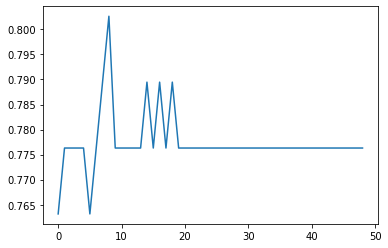

In [64]:
plt.plot(scores)


# ploting

In [71]:
X_train[:, :10].shape

(226, 10)

In [97]:
X_train.shape 

(226, 22298)

In [98]:
X_test.shape

(76, 22298)

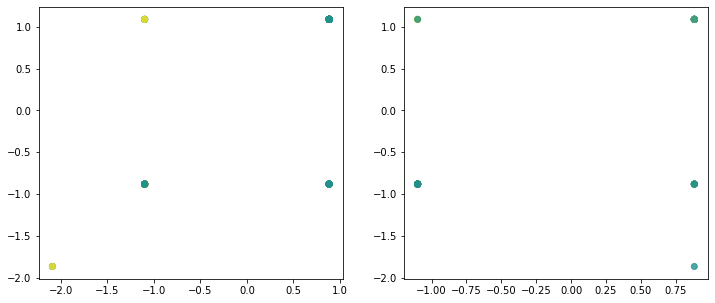

In [105]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, alpha=0.8)
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test, alpha=0.8)